In [132]:
import numpy as np

# Macierze przejsc
Ogólny schemat macierzy przejsc:
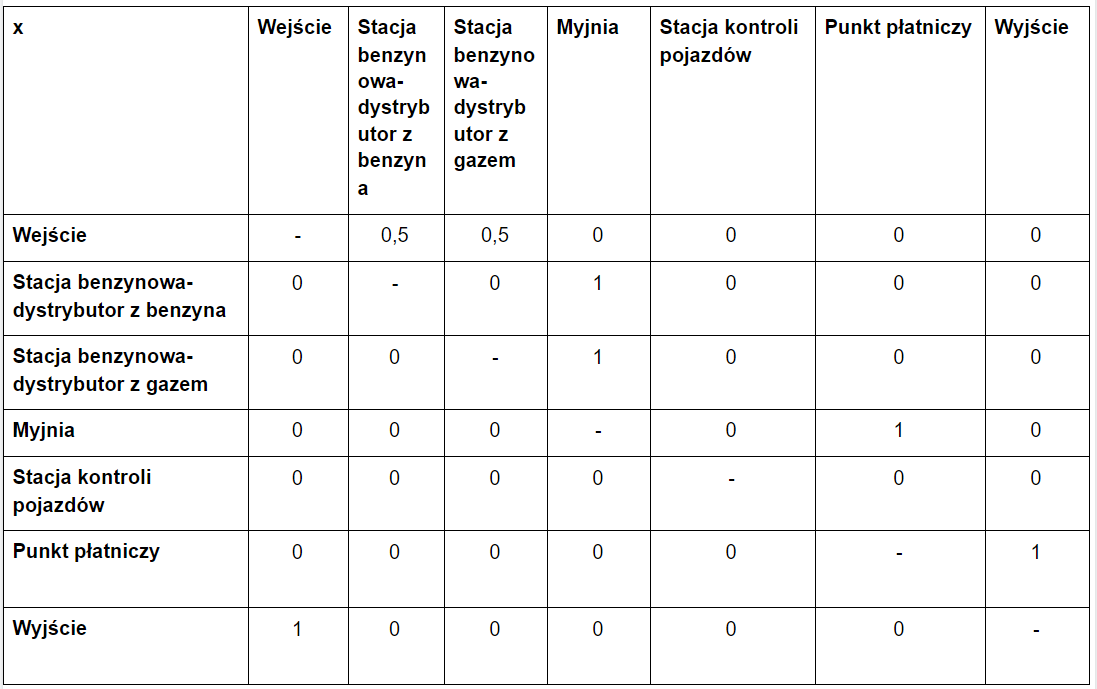

### Klasa 1- tankowanie, mycie
Przebieg: tankowanie benzyna/gazem -> myjnia -> kasa

In [133]:
p1 = np.asarray([
                [0,0.5,0.5,0,0,0], 
                [0,0,0,1,0,0], 
                [0,0,0,1,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0]
              ])

### Klasa 2- tankowanie
Przebieg: tankowanie benzyna/gazem -> kasa

In [134]:
p2 = np.asarray([
                [0,0.5,0.5,0,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0] 
              ])

### Klasa 3- badania okresowe, tankowanie
Przebieg: badania okresowe pojazdów -> tankowanie benzyna/gazem -> kasa

In [135]:
p3 = np.asarray([
                [0,0,0,0,1,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0.5,0.5,0,0,0], 
                [0,0,0,0,0,0] 
              ])

### Klasa 4- badania okresowe
Przebieg: badania okresowe pojazdów -> kasa

In [136]:
p4 = np.asarray([
                [0,0,0,0,1,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,1],
                [0,0,0,0,0,0] 
              ])

### Klasa 5- myjnia
Przebieg: myjnia -> kasa

In [137]:
p5 = np.asarray([
                [0,0,0,1,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0],
                [0,0,0,0,0,0]
              ])

### Klasa 6- myjnia, badania okresowe
Przebieg: myjnia -> przegląd -> kasa

In [138]:
p6 = np.asarray([
                [0,0,0,1,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,1,0], 
                [0,0,0,0,0,1],
                [0,0,0,0,0,0]
              ])


In [139]:
p = [p1, p2, p3, p4, p5, p6]

In [140]:
_lambda = 100

In [141]:
_class_lambdas = [0.1 * _lambda, 0.3 * _lambda, 0.2 * _lambda, 0.1 * _lambda, 0.15 * _lambda, 0.15 * _lambda]

## Przepustowość każdej klasy w każdym systemie 
- r- index klasy, r=1,..,R
- i- index systemu, i=1,..,N
- N- liczba systemow
- R- liczba klas

lambda(0,ir) to jest lambda wejsciowa dla kazdego systemu

In [142]:
def lambda_ir(N, p, i, r):
    sum = _class_lambdas[r] * p[r][0][i+1]
#     print(sum)
    for j in range(N):
#         print("###############")
#         print("p[r][j][i+1] = ", p[r][j][i+1])
#         print("_class_lambdas[r] = ", _class_lambdas[r] )
#         print("p[r][0][j] = ", p[r][0][j])
        sum += p[r][j+1][i+1] * _class_lambdas[r] * p[r][0][j+1]
#         print("###############")
    return sum
    
#     sum = 0
#     for j in range(1, N):
#         for s in range(1, R):
#             sum += _lambda[j][s] * p[s][j][i]

In [143]:
#problem z implementacja/ zrozumieniem wzoru

In [144]:
N = 5
R = len(_class_lambdas)
lambdas_ir = []

for i in range(N):
    lambdas_ir_class = []
    for r in range(R):
        lambdas_ir_class.append(lambda_ir(N, p, i, r))
    lambdas_ir.append(lambdas_ir_class)

print("\t  k1\tk2    k3    k4   k5   k6")
for i in range(len(lambdas_ir)):
    print("system {}".format(i+1), lambdas_ir[i])

	  k1	k2    k3    k4   k5   k6
system 1 [5.0, 15.0, 10.0, 0.0, 0.0, 0.0]
system 2 [5.0, 15.0, 10.0, 0.0, 0.0, 0.0]
system 3 [10.0, 0.0, 0.0, 0.0, 15.0, 15.0]
system 4 [0.0, 0.0, 20.0, 10.0, 0.0, 15.0]
system 5 [0.0, 30.0, 0.0, 10.0, 15.0, 0.0]


### Względna intensywność obsługi każdej klasy w każdym systemie

In [145]:
m = [2,3,4,2,2,2]
mu = [[1 for r in range(R)] for i in range(N)]
ro_ir = []
for i in range(N):
    ro_class = []
    for r in range(R):
        ro_class.append(lambdas_ir[i][r] / (m[i] * mu[i][r]))
    ro_ir.append(ro_class)
ro_ir

[[2.5, 7.5, 5.0, 0.0, 0.0, 0.0],
 [1.6666666666666667, 5.0, 3.3333333333333335, 0.0, 0.0, 0.0],
 [2.5, 0.0, 0.0, 0.0, 3.75, 3.75],
 [0.0, 0.0, 10.0, 5.0, 0.0, 7.5],
 [0.0, 15.0, 0.0, 5.0, 7.5, 0.0]]

## Implementacja algorytmu rekurencyjnego

In [146]:
numOfClasses = 6
numOfSystems= 5

In [147]:
# countSys(0, 2, printData = True) #Przyklad dzialania

In [148]:
def countSys(sysNum, classNum, printData = False):
    if(printData):
        print("System: ", sysNum, "        Klasa: ", classNum )
    sum = 0;
    sum += _class_lambdas[classNum] * p[classNum][0][sysNum + 1];
    
    if(printData):
        print("Suma poczatkowa: ", sum)
    isColEmpty = True
    for i in range(1 , numOfSystems + 1):
        if(p[classNum][i][sysNum + 1] != 0):
            isColEmpty = False
            break
    
    if(printData):
        print("Czy zgloszenia przychodza z innych systemow: ", not isColEmpty, end = "\n\n")
        
    if(not isColEmpty):
        for i in range(1, numOfSystems + 1):
            if(p[classNum][i][sysNum + 1] != 0):
                sum += countSys(i-1, classNum, True if printData else False) * p[classNum][i][sysNum + 1]
    if(printData and (not isColEmpty)):
        print("Ilosc zgloszen z innych systemow: ", sum - _class_lambdas[classNum] * p[classNum][0][sysNum + 1])
                
    return sum;

In [149]:
#Uzupelnienie lambd ir

lam = [[0 for col in range(6)] for row in range(5)]

for classNum in range(0, numOfClasses):
    for sysNum in range(0, numOfSystems):
        lam[sysNum][classNum] = countSys(sysNum, classNum)
lam

[[5.0, 15.0, 10.0, 0.0, 0.0, 0.0],
 [5.0, 15.0, 10.0, 0.0, 0.0, 0.0],
 [10.0, 0.0, 0.0, 0.0, 15.0, 15.0],
 [0.0, 0.0, 20.0, 10.0, 0.0, 15.0],
 [10.0, 30.0, 20.0, 10.0, 15.0, 15.0]]

In [150]:
m = [2,3,4,2,2]
mu = [[(i+1)*20 for r in range(R)] for i in range(N)]
print(mu)
ro_ir = []
for i in range(N):
    ro_class = []
    for r in range(R):
        ro_class.append(lam[i][r] / (m[i] * mu[i][r]))
    ro_ir.append(ro_class)
ro_ir

[[20, 20, 20, 20, 20, 20], [40, 40, 40, 40, 40, 40], [60, 60, 60, 60, 60, 60], [80, 80, 80, 80, 80, 80], [100, 100, 100, 100, 100, 100]]


[[0.125, 0.375, 0.25, 0.0, 0.0, 0.0],
 [0.041666666666666664, 0.125, 0.08333333333333333, 0.0, 0.0, 0.0],
 [0.041666666666666664, 0.0, 0.0, 0.0, 0.0625, 0.0625],
 [0.0, 0.0, 0.125, 0.0625, 0.0, 0.09375],
 [0.05, 0.15, 0.1, 0.05, 0.075, 0.075]]

# Wyznaczyć prawdopodobieństwa stanów sieci

In [151]:
def pi_k_i(ro_i, k_i, m_i):
    if m_i == 1:
        return (1 - ro_i)*ro_i**k_i
    else:
        sum_ = 0
        for i in range(m_i):
            sum_ += (m_i*ro_i)**i/np.math.factorial(i)
        sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
        if k_i <= m_i:
            return 1/sum_*(m_i*ro_i)**k_i/np.math.factorial(k_i)
        else:
            return 1/sum_*m_i**m_i*ro_i**k_i/np.math.factorial(m_i)

In [152]:
def ro_i(i):
    return np.sum(ro_ir[i])

In [153]:
probabilities = []
for i in range(N):
    probabilities_i = []
    for k in range(10):
        probabilities_i.append(pi_k_i(ro_i(i), k, m[i]))
    probabilities.append(probs_i)
probabilities

[[0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.08333333333333333,
  0.041666666666666664,
  0.020833333333333332,
  0.010416666666666666,
  0.005208333333333333,
  0.0026041666666666665,
  0.0013020833333333333],
 [0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.08333333333333333,
  0.041666666666666664,
  0.020833333333333332,
  0.010416666666666666,
  0.005208333333333333,
  0.0026041666666666665,
  0.0013020833333333333],
 [0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.08333333333333333,
  0.041666666666666664,
  0.020833333333333332,
  0.010416666666666666,
  0.005208333333333333,
  0.0026041666666666665,
  0.0013020833333333333],
 [0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.08333333333333333,
  0.041666666666666664,
  0.020833333333333332,
  0.010416666666666666,
  0.005208333333333333,
  0.0026041666666666665,
  0.0013020833333333333],
 [0.3333333333333333,
  0.3333333333333333,
  0.1666

# Wyznaczyć średnie liczby zgłoszeń klasy „r” w każdym systemie „i”

In [154]:
import math
def K_ir(ro_ir, ro_i, m_i):
    k_ir = m_i * ro_ir
    denominator = 0
    for k_i in range(m_i - 1):
        denominator += ((m_i * ro_i) ** k_i) / math.factorial(k_i)
    denominator += ( ((m_i * ro_i) ** m_i) / math.factorial(m_i) ) * 1 / (1 - ro_i)
    k_ir += (ro_ir / (1 - ro_i)) * (((m_i * ro_i) ** m_i) / (math.factorial(m_i) * (1 - ro_i))) * (1 / denominator)
    return k_ir

In [155]:
k_ir_list = []
for i in range(N):
    r_list = []
    for r in range(R):
        r_list.append(K_ir(ro_ir[i][r], ro_i(i), m[i]))
    k_ir_list.append(r_list)
for i in k_ir_list:
    print(i)

[0.6590909090909092, 1.9772727272727273, 1.3181818181818183, 0.0, 0.0, 0.0]
[0.12782485875706215, 0.3834745762711864, 0.2556497175141243, 0.0, 0.0, 0.0]
[0.16692674469007368, 0.0, 0.0, 0.0, 0.25039011703511055, 0.25039011703511055]
[0.0, 0.0, 0.28137406797714726, 0.14068703398857363, 0.0, 0.21103055098286047]
[0.15000000000000002, 0.44999999999999996, 0.30000000000000004, 0.15000000000000002, 0.22499999999999998, 0.22499999999999998]


# Optymalizacja

In [156]:
def Q_ir(ro_ir, ro_i, m_i):
    q_ir = m_i * ro_ir
    denominator = 0
    for k_i in range(m_i - 1):
        denominator += ((m_i * ro_i) ** k_i) / math.factorial(k_i)
    denominator += ( ((m_i * ro_i) ** m_i) / math.factorial(m_i) ) * 1 / (1 - ro_i)
    q_ir += (ro_ir / (1 - ro_i)) * (((m_i * ro_i) ** m_i) / (math.factorial(m_i) * (1 - ro_i))) * (1 / denominator)
    return q_ir

In [157]:
C1 = np.asarray([
                [0.1,0.3,0.2,0,0,0], 
                [0.1,0.3,0.2,0,0,0], 
                [0.2,0,0,0,0.3,0.3], 
                [0,0,0.4,0.2,0,0.3], 
                [0.2,0.6,0.4,0.2,0.3,0.3]
              ])
C2 = np.asarray([0.1,0.2,0.3,0.4,0.5])

In [158]:
def f_c(lambda_list, m, mu, N, R):
    for i in range(N):
        _sum = 0
        for j in range(R):
            _sum += C1[i][j] * Q_ir(ro_ir[i][j], ro_i(i), m[i])
        m_nzi = m[i] - ro_i(i)  
        _sum += C2[i] * m_nzi
    return _sum

In [159]:
f_c(lam, m, mu, N, R)

1.335

#### Poszukiwanie optymalnej liczby kanałów obsługi w systemie M/M/m/FIFO/inf

In [160]:
from geneticalgorithm import geneticalgorithm as ga
def f_c(m):
    for i in range(N):
        _sum = 0
        for j in range(R):
            _sum += C1[i][j] * Q_ir(ro_ir[i][j], ro_i(i), int(m[i]))
        m_nzi = m[i] - ro_i(i)  
        _sum += C2[i] * m_nzi
    return _sum

In [161]:
f_c(m)

1.335

In [163]:
varbound = np.array([[1, 5], [1, 5], [1, 5], [1, 5], [1, 5], [1, 5]])

In [164]:
model = ga(function=f_c, dimension=6, variable_type='int', variable_boundaries=varbound)

 The best solution found:                                                                           
 [1. 3. 2. 2. 1. 3.]

 Objective function:
 0.8350000000000001


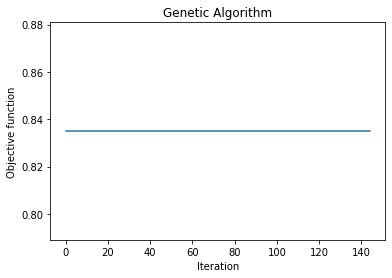

In [165]:
model.run()